In [ ]:
# Data Manipulation and Analysis
import pandas as pd  # For data manipulation, handling data frames, and reading datasets.
import numpy as np  # For numerical operations, handling arrays, and mathematical functions.

# Data Visualization
import seaborn as sns  # For statistical data visualization.
import matplotlib.pyplot as plt  # For general plotting and visualizing graphs.

# Clustering Algorithms
from sklearn.cluster import DBSCAN  # Density-based clustering algorithm.
from sklearn.cluster import AgglomerativeClustering  # Hierarchical clustering algorithm.
from sklearn.cluster import KMeans  # K-Means clustering algorithm.

# Preprocessing Tools
from sklearn.preprocessing import MinMaxScaler  # To scale features to a range (e.g., 0 to 1).
from sklearn import preprocessing  # For various preprocessing utilities.

# Dimensionality Reduction
from sklearn.decomposition import PCA  # Principal Component Analysis for reducing dataset dimensions.

In [ ]:
# Load the dataset from a CSV file into a DataFrame using pandas.
df=pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows of the DataFrame to get a quick look at the data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Display a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Import the LabelEncoder class from sklearn's preprocessing module.
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder.
le=LabelEncoder()

# Apply the LabelEncoder to the 'Gender' column in the DataFrame.
df['Gender']=le.fit_transform(df['Gender'])

# Display the unique values in the transformed 'Gender' column to verify the encoding.
df['Gender'].unique()

array([1, 0])

In [ ]:
# Display the first 5 rows of the DataFrame to get a quick look at the data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Create an instance of PCA, specifying the number of components to keep (in this case, 2).
pca=PCA(n_components=2)

In [ ]:
# Apply PCA transformation on the DataFrame (df).
r_data=pca.fit_transform(df)

# Display the transformed data, which now has only 2 dimensions (or components).
r_data

array([[-1.09383941e+02, -5.47845404e+00],
       [-1.08202857e+02,  3.49317649e+01],
       [-1.07376292e+02, -3.78408717e+01],
       [-1.06007807e+02,  3.05626965e+01],
       [-1.04980323e+02, -7.29674715e+00],
       [-1.03774723e+02,  2.98012381e+01],
       [-1.02996481e+02, -4.13227699e+01],
       [-1.01426745e+02,  4.70713035e+01],
       [-1.00952191e+02, -5.09237382e+01],
       [-9.93805223e+01,  2.40346077e+01],
       [-9.90706564e+01, -4.09178725e+01],
       [-9.74040858e+01,  4.91523683e+01],
       [-9.67777825e+01, -3.78938689e+01],
       [-9.52523148e+01,  3.02508027e+01],
       [-9.48417033e+01, -3.50274282e+01],
       [-9.34009908e+01,  3.26452221e+01],
       [-9.24499251e+01, -1.31741290e+01],
       [-9.12420152e+01,  2.04349779e+01],
       [-8.99471970e+01, -2.29456992e+01],
       [-8.84752130e+01,  4.81072460e+01],
       [-8.75736418e+01, -1.32190190e+01],
       [-8.63488497e+01,  2.60551150e+01],
       [-8.56046385e+01, -4.49591024e+01],
       [-8.

In [ ]:
# Use the scale() function from sklearn's preprocessing module to standardize the PCA-transformed data.
# Standardization ensures that the data has a mean of 0 and a standard deviation of 1 for each feature.
data=preprocessing.scale(r_data)

In [ ]:
# Convert the standardized NumPy array (data) into a pandas DataFrame.
data=pd.DataFrame(data,columns=['X','Y'])

In [ ]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

**K Means Clusteing**

Text(0, 0.5, 'Sum of squared Error')

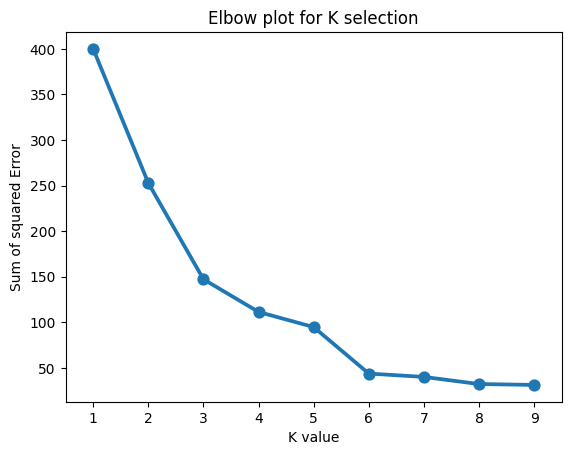

In [ ]:
# Create a point plot using seaborn to visualize the Sum of Squared Errors (SSE) for different values of k.
sns.pointplot(x=np.arange(1,10),y=sse)

# Set the title for the plot to describe what is being shown.
plt.title('Elbow plot for K selection')

# Label the x-axis to indicate that it represents the k values (number of clusters).
plt.xlabel('K value')

# Label the y-axis to indicate that it represents the Sum of Squared Error (SSE).
plt.ylabel('Sum of squared Error')

In [ ]:
# Install the 'kneed' library, which is useful for finding the "elbow" point in a dataset.
pip install kneed

In [ ]:
# Import the KneeLocator class from the kneed library to help identify the elbow point in the SSE curve.
from kneed import KneeLocator

kl=KneeLocator(np.arange(1,10),sse,S=1.0,curve='convex',direction='decreasing')

# Print the identified elbow point, which represents the optimal number of clusters.
print(kl.elbow)

6


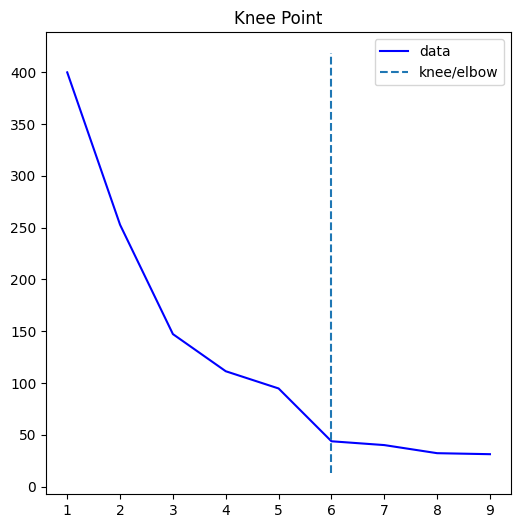

In [ ]:
# Plot the elbow point using the KneeLocator instance 'kl'.
kl.plot_knee()

In [ ]:
# Create an instance of the KMeans clustering algorithm with a specified number of clusters.
# In this case, we are setting the number of clusters (n_clusters) to 4.
kmeans = KMeans(n_clusters=4)

In [ ]:
# Fit the KMeans model to the specified features ('X' and 'Y') in the DataFrame
cluster=kmeans.fit_predict(data[['X','Y']])

In [ ]:
# Create an instance of the KMeans clustering algorithm with a specified number of clusters.
# In this case, we are setting the number of clusters (n_clusters) to 4.
kmeans = KMeans(n_clusters=4)

In [ ]:
# Fit the KMeans model to the specified features ('X' and 'Y') in the DataFrame
cluster=kmeans.fit_predict(data[['X','Y']])

In [ ]:
# Add the predicted cluster labels (from the KMeans algorithm) to the DataFrame 'data'.
data['cluster']=cluster

In [ ]:
# Display the first few rows of the DataFrame 'data' to inspect its contents.
data.head()

,X,Y,cluster
0,-1.730708,-0.208398,1
1,-1.712020,1.328786,0
2,-1.698942,-1.439447,1
3,-1.677289,1.162589,0
4,-1.661032,-0.277564,1


In [ ]:
# Count the number of occurrences of each unique cluster label in the 'cluster' column of the DataFrame.
data['cluster'].value_counts()

,count
cluster,
1,100
3,39
2,38
0,23


In [ ]:
# Create a new DataFrames 'df1','df2','df3','df4' that contains only the data points belonging to cluster 0,1,2,3.
df1=data[data['cluster']==0]
df2=data[data['cluster']==1]
df3=data[data['cluster']==2]
df4=data[data['cluster']==3]

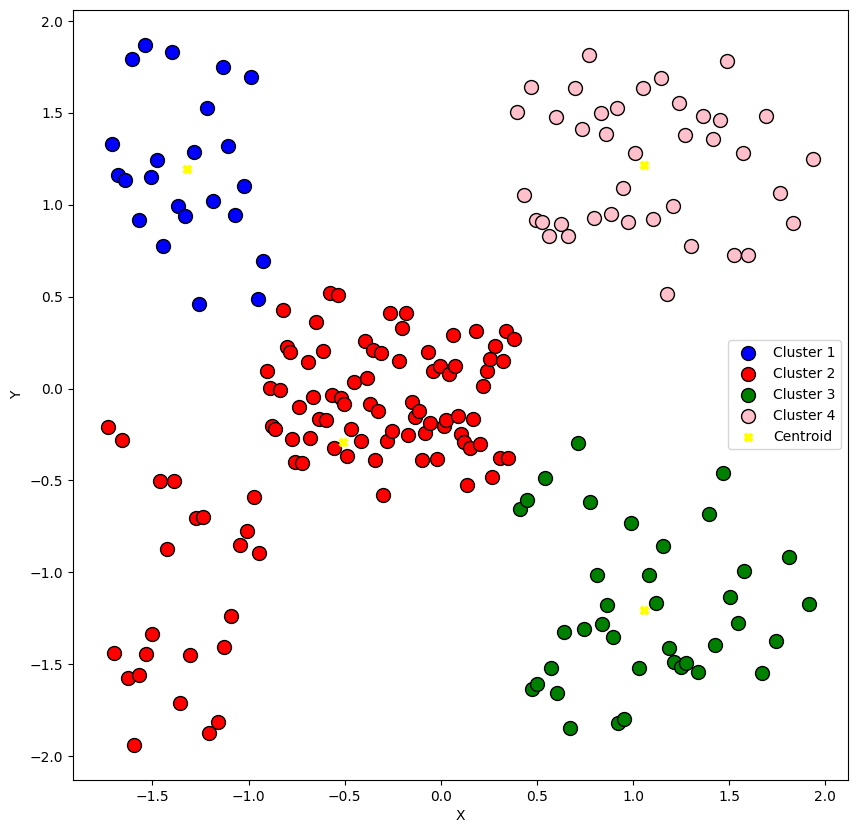

In [ ]:
# Create a new figure for the plot with a specified size of 10x10 inches.
plt.figure(figsize=(10,10))

# Scatter plot for data points in Cluster 1 (df1) with blue color and black edges.
plt.scatter(df1.values[:,0],df1.values[:,1],color='blue',label='Cluster 1', edgecolors='black',s=100)

# Scatter plot for data points in Cluster 2 (df2) with red color and black edges.
plt.scatter(df2.values[:,0],df2.values[:,1],color='red',label='Cluster 2', edgecolors='black',s=100)

# Scatter plot for data points in Cluster 3 (df3) with green color and black edges.
plt.scatter(df3.values[:,0],df3.values[:,1],color='green',label='Cluster 3', edgecolors='black',s=100)

# Scatter plot for data points in Cluster 4 (df4) with pink color and black edges.
plt.scatter(df4.values[:,0],df4.values[:,1],color='pink',label='Cluster 4', edgecolors='black',s=100)

# Label the x-axis as 'X'.
plt.xlabel('X')

# Label the y-axis as 'Y'.
plt.ylabel('Y')

# Scatter plot for the cluster centroids with a yellow 'X' marker.
# - kmeans.cluster_centers_[:,0] and kmeans.cluster_centers_[:,1] refer to the centroids' X and Y coordinates.
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='X',color='yellow', label='Centroid')

# Add a legend to the plot to identify the clusters and the centroid.
plt.legend()

**DBSCAN Cluster**

In [ ]:
# Initialize the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) model with the following parameters:
# - eps=1.0: Defines the maximum distance between two samples for one to be considered
#   as being in the neighborhood of the other. A smaller eps value can lead to more clusters,
#   while a larger eps value can merge clusters or treat more points as noise.

# - metric='euclidean': Specifies the distance metric to use for calculating the distance
#   between data points. Here, the Euclidean distance is employed, which is the default and
#   measures the straight-line distance between points in space.
db=DBSCAN(eps=1.0,metric='euclidean')

In [ ]:
# Fit the DBSCAN model to the dataset 'data' and predict the cluster labels for each data point.
pr=db.fit_predict(data)

In [ ]:
# Assign the cluster labels obtained from the DBSCAN model (stored in 'pr') to a new column 'cluster' in the DataFrame 'data'.
data['cluster']=pr

In [ ]:
# Display the first few rows of the DataFrame 'data'.
data.head()

,X,Y,cluster
0,-1.730708,-0.208398,0
1,-1.712020,1.328786,1
2,-1.698942,-1.439447,0
3,-1.677289,1.162589,1
4,-1.661032,-0.277564,0


In [ ]:
# Count the number of occurrences of each unique value in the 'cluster' column of the DataFrame 'data'.
data['cluster'].value_counts()

,count
cluster,
0,100
2,39
3,38
1,23


In [ ]:
# Extract the data points classified as outliers (label -1).
outliers_data=data[data['cluster']==-1]
# Extract the data points classified as belonging to Cluster 1 (label 0).
cluster1_data=data[data['cluster']==0]
# Extract the data points classified as belonging to Cluster 2 (label 1).
cluster2_data=data[data['cluster']==1]
# Extract the data points classified as belonging to Cluster 3 (label 2).
cluster3_data=data[data['cluster']==2]
# Extract the data points classified as belonging to Cluster 4 (label 3).
cluster4_data=data[data['cluster']==3]

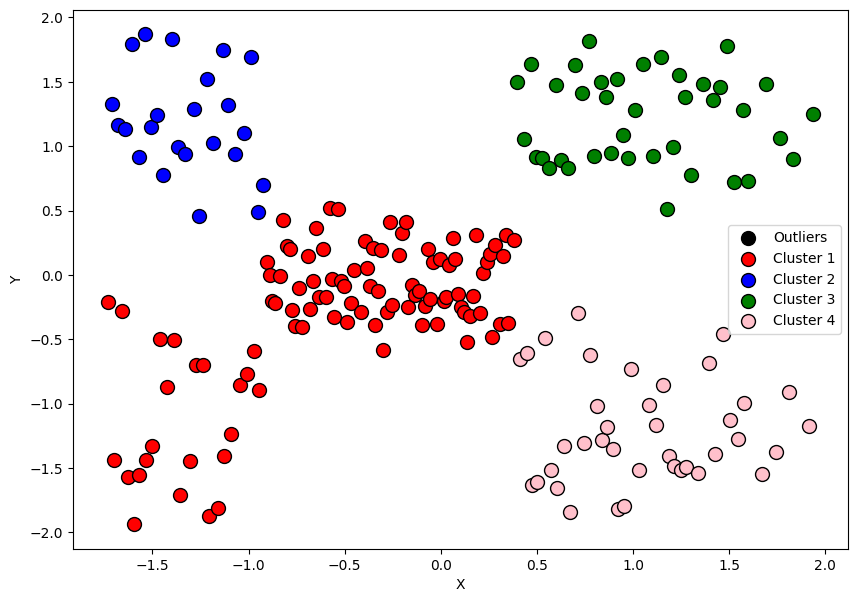

In [ ]:
# Create a new figure for the plot with a specified size of 10x17 inches.
plt.figure(figsize=(10,7))
# Plot the outliers using a black color and black edges.
plt.scatter(outliers_data['X'],outliers_data['Y'],color='black',label='Outliers', edgecolors='black',s=100)

# Plot the data points for Cluster 1 using a red color and black edges.
plt.scatter(cluster1_data['X'],cluster1_data['Y'],color='red',label='Cluster 1', edgecolors='black',s=100)

# Plot the data points for Cluster 2 using a  lue color and black edges.
plt.scatter(cluster2_data['X'],cluster2_data['Y'],color='blue',label='Cluster 2', edgecolors='black',s=100)

# Plot the data points for Cluster 3 using a green color and black edges.
plt.scatter(cluster3_data['X'],cluster3_data['Y'],color='green',label='Cluster 3', edgecolors='black',s=100)

# Plot the data points for Cluster 4 using a pink color and black edges.
plt.scatter(cluster4_data['X'],cluster4_data['Y'],color='pink',label='Cluster 4', edgecolors='black',s=100)

# Label the x-axis as 'X'.
plt.xlabel('X')

# Label the y-axis as 'Y'.
plt.ylabel('Y')

# Add a legend to the plot to identify the clusters and the centroid.
plt.legend()

**Hierarchical Clustering**

In [ ]:
# Import the hierarchical clustering module from the SciPy library, specifically the 'cluster' subpackage.
import scipy.cluster.hierarchy as sch

In [ ]:
# Randomly sample 100 rows from the DataFrame 'data'.
data1=data.sample(100)

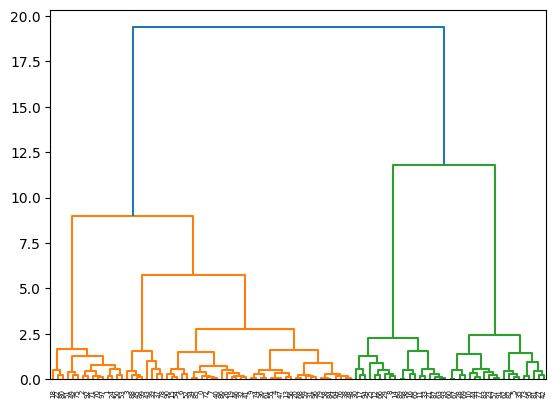

In [ ]:
# Generate a dendrogram from the linkage matrix.
dend=sch.dendrogram(sch.linkage(data1.values,method='ward'))

In [ ]:
# Initialize the Agglomerative Clustering model with the following parameters:
# - n_clusters=2: Specify the number of clusters to form, in this case, 2 clusters.
# - linkage='ward': Use the Ward variance minimization algorithm, which minimizes the total within-cluster variance.
H = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [ ]:
# Fit the Agglomerative Clustering model (H) to the dataset (data) and predict the cluster labels for each data point.
pred=H.fit_predict(data)

In [ ]:
temp=data

In [ ]:
# Add the predicted cluster labels from the Agglomerative Clustering model (stored in 'pred') to the DataFrame 'temp'.
temp['cluster']=pred

In [ ]:
# Count the number of occurrences of each cluster label in the 'cluster' column of the 'temp' DataFrame.
temp['cluster'].value_counts()

,count
cluster,
1,123
0,77


In [ ]:
# Create a new DataFrame 'temp1' that contains only the data points from the 'temp' DataFrame that belong to Cluster 0
temp1=temp[temp['cluster']==0]
# Create a new DataFrame 'temp2' that contains only the data points from the 'temp' DataFrame that belong to Cluster 1
temp2=temp[temp['cluster']==1]

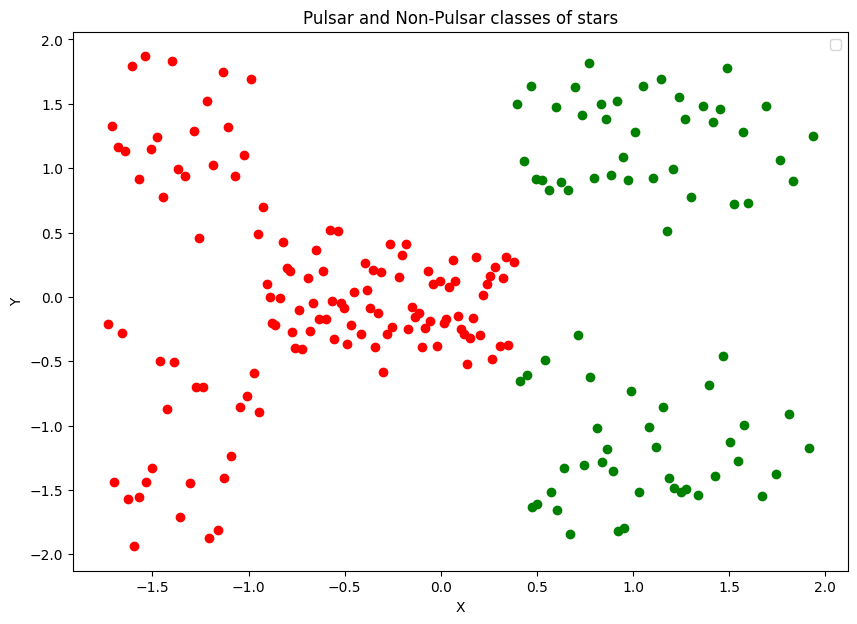

In [ ]:
# Create a new figure for the plot with a specified size of 10x7 inches.
plt.figure(figsize=(10,7))

plt.scatter(temp1.values[:,0],temp1.values[:,1],color='green')
plt.scatter(temp2.values[:,0],temp2.values[:,1],color='red')

# Label the x-axis as 'Y'.
plt.xlabel('X')
# Label the y-axis as 'Y'.
plt.ylabel('Y')

# Set the title of the plot to describe what it represents.
plt.title('Pulsar and Non-Pulsar classes of stars')

# Add a legend to the plot to identify the clusters and the centroid.
plt.legend()

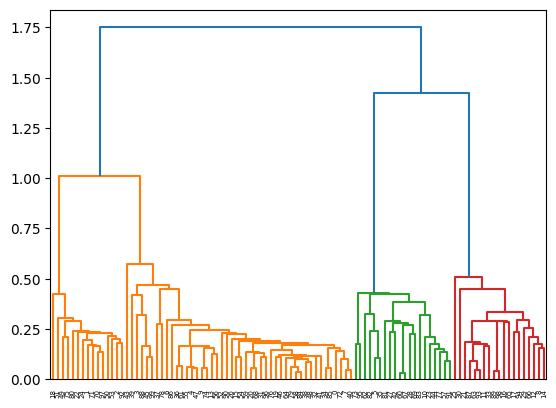

In [ ]:
dend=sch.dendrogram(sch.linkage(data1.values,method='single'))

In [ ]:
H=AgglomerativeClustering(n_clusters=2,linkage='single')

In [ ]:
pred=H.fit_predict(data)

In [ ]:
temp=data

In [ ]:
temp['cluster']=pred

In [ ]:
temp['cluster'].value_counts()

,count
cluster,
1,123
0,77


In [ ]:
temp1=temp[temp['cluster']==0]
temp2=temp[temp['cluster']==1]

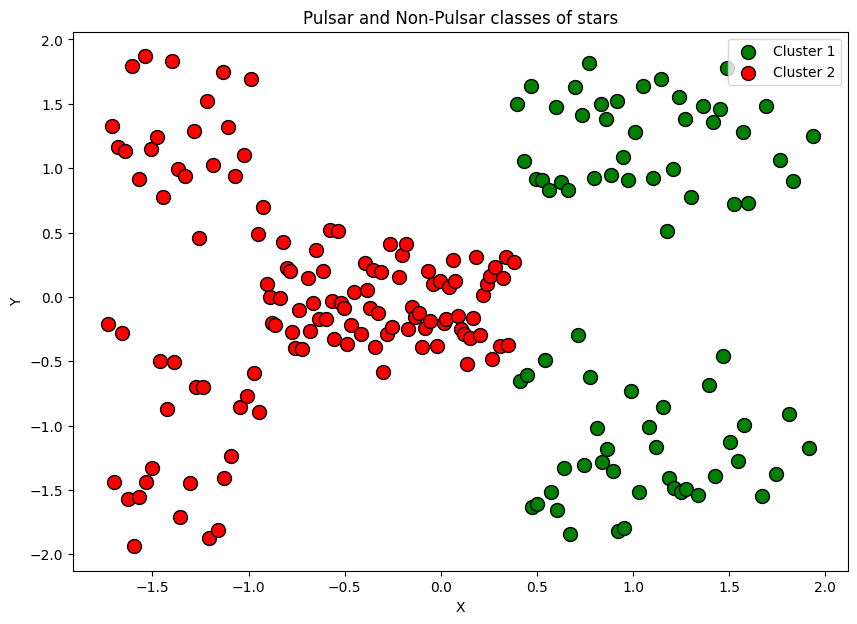

In [ ]:
# Create a new figure for the plot with a specified size of 10x7 inches.
plt.figure(figsize=(10,7))

plt.scatter(temp1.values[:,0],temp1.values[:,1],color='green',label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color='red',label='Cluster 2', edgecolors='black',s=100)

# Label the x-axis as 'Y'.
plt.xlabel('X')
# Label the y-axis as 'Y'.
plt.ylabel('Y')

# Set the title of the plot to describe what it represents.
plt.title('Pulsar and Non-Pulsar classes of stars')

# Add a legend to the plot to identify the clusters and the centroid.
plt.legend()

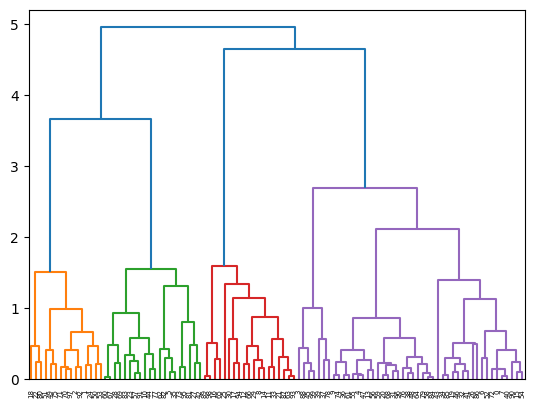

In [ ]:
dend=sch.dendrogram(sch.linkage(data1.values,method='complete'))

In [ ]:
H=AgglomerativeClustering(n_clusters=2, linkage='complete')

In [ ]:
pred=H.fit_predict(data)

In [ ]:
temp=data

In [ ]:
temp['cluster']=pred

In [ ]:
# Count the number of occurrences of each unique cluster label in the 'cluster' column of the DataFrame.
temp['cluster'].value_counts()

,count
cluster,
0,123
1,77


In [ ]:
# Create a new DataFrame 'temp1' that contains only the data points belonging to cluster 0 from the 'temp' DataFrame.
temp1=temp[temp['cluster']==0]

# Create a new DataFrame 'temp2' that contains only the data points belonging to cluster 1 from the 'temp' DataFrame.
temp2=temp[temp['cluster']==1]

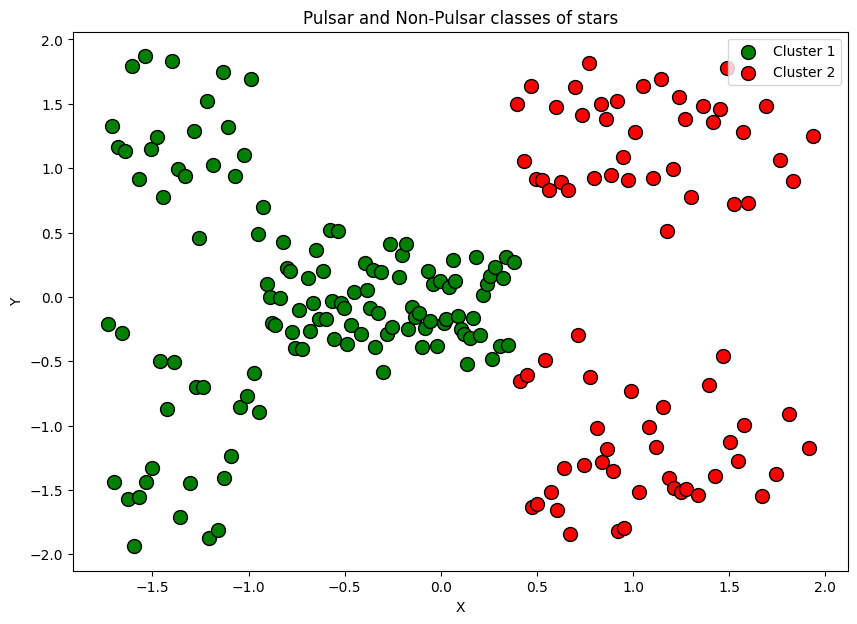

In [ ]:
# Create a new figure for the plot with a specified size of 10x7 inches.
plt.figure(figsize=(10,7))

# Plot the data points for Cluster 1 (temp1) using a green color and black edges
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1',edgecolors='black',s=100)
# Plot the data points for Cluster 2 (temp2) using a red color and black edges.
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2',edgecolors='black',s=100)

# Label the x-axis as 'X'.
plt.xlabel('X')
# Label the y-axis as 'Y'.
plt.ylabel('Y')

# Set the title of the plot to describe what it represents.
plt.title('Pulsar and Non-Pulsar classes of stars')

# Add a legend to the plot to identify the clusters and the centroid.
plt.legend()